# **Fully automated** modeling of a lensed quasar

## Setting up the 

Setting up `dolphin`:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
        - **masks**: contains the custom 'mask_{lens_name}_{band}.npy' files (optional),
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_variance_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Imports

In [1]:
from dolphin.processor import Processor
from dolphin.analysis import Output
from dolphin.ai import Vision
from dolphin.ai import Modeler

import matplotlib.pyplot as plt
import numpy as np

## Run the automated model

In [2]:
io_directory_path = "../io_directory_example/"
lens_name = "lensed_quasar"
band = "F814W"

vision = Vision(io_directory_path=io_directory_path, source_type="quasar")
segementation = vision.create_segmentation_for_single_lens(lens_name, band)
# above line will save the segmentation result in output/semantic_segmentation_lensed_quasar_F814W.npy

modeler = Modeler(io_directory_path=io_directory_path)
modeler.create_config_for_single_lens(lens_name, band)
# above line will save the config file in settings/config_lensed_quasar.yml and a mask in
# output/masks/mask_lensed_quasar_F814W.npy

processor = Processor(io_directory_path)
processor.swim(lens_name=lens_name, model_id="example", log=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Optimizing model for lensed_quasar with recipe: default.
Computing the PSO ...


  0%|          | 0/50 [00:00<?, ?it/s]/Users/ajshajib/Vault/software_dev/lenstronomy/lenstronomy/LensModel/Solver/solver4point.py:96: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  x = scipy.optimize.fsolve(
 18%|█▊        | 9/50 [00:30<02:07,  3.12s/it]/Users/ajshajib/Vault/software_dev/lenstronomy/lenstronomy/LensModel/Solver/solver4point.py:96: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  x = scipy.optimize.fsolve(
100%|██████████| 50/50 [02:35<00:00,  3.12s/it]


Max iteration reached! Stopping.
-1.0197315953889354 reduced X^2 of best position
-2102.686549691985 log likelihood
4124 effective number of data points
[{'theta_E': 0.7103419762813676, 'gamma': 2.0, 'e1': -0.04455339450729132, 'e2': 0.18253745940826058, 'center_x': -0.1557705341840549, 'center_y': 0.07046355518274051}, {'gamma_ext': 0.056930901511008714, 'psi_ext': 0.7279716690046726, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.21581812197850112, 'n_sersic': 2.253188273042218, 'e1': 0.06131940231579304, 'e2': -0.06499552191855029, 'center_x': -0.14426909578582736, 'center_y': 0.09269143677671414}] source result
[{'amp': 1, 'R_sersic': 0.1928591664354942, 'n_sersic': 4.0, 'e1': 0.00020652651416462955, 'e2': -0.0014929203680390042, 'center_x': -0.1683020734072939, 'center_y': 0.06715443061899222}] lens light result
[{'ra_image': array([-0.53569436,  0.53584655, -0.68105382,  0.18667001]), 'dec_image': array([-0.48603065, -0.15351764,  0.54137721,  0.69328959]), 'point_

100%|██████████| 50/50 [03:01<00:00,  3.62s/it]


Max iteration reached! Stopping.
-0.8098161756463542 reduced X^2 of best position
-1669.8409541827823 log likelihood
4124 effective number of data points
[{'theta_E': 0.705973004563298, 'gamma': 2.0, 'e1': -0.01955973119893884, 'e2': 0.1430151444022705, 'center_x': -0.15345418019046242, 'center_y': 0.07282544185702215}, {'gamma_ext': 0.04533166433135142, 'psi_ext': 0.6026332195381735, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.21719222095799545, 'n_sersic': 5.023064651104617, 'e1': -0.005355129099694658, 'e2': -0.09925425865148164, 'center_x': -0.1427850872982342, 'center_y': 0.09133043281434153}] source result
[{'amp': 1, 'R_sersic': 0.28322822304506107, 'n_sersic': 4.0, 'e1': 0.00022243289759135118, 'e2': -0.0013493163991296902, 'center_x': -0.16874361958539, 'center_y': 0.07182295702938449}] lens light result
[{'ra_image': array([-0.5345102 ,  0.53366199, -0.68414173,  0.18927761]), 'dec_image': array([-0.48555473, -0.1562903 ,  0.53840213,  0.68901912]), 'point_a

100%|██████████| 50/50 [03:00<00:00,  3.61s/it]


Max iteration reached! Stopping.
-0.80258630701865 reduced X^2 of best position
-1654.9329650724562 log likelihood
4124 effective number of data points
[{'theta_E': 0.7068271484532006, 'gamma': 2.0, 'e1': -0.025016066893796256, 'e2': 0.15260854387312048, 'center_x': -0.15372218479636277, 'center_y': 0.0722597747309169}, {'gamma_ext': 0.048060265656078356, 'psi_ext': 0.6356786241485646, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.22151763701607288, 'n_sersic': 4.655528982928159, 'e1': 0.007779488283099355, 'e2': -0.09821767493696039, 'center_x': -0.14312412943608482, 'center_y': 0.09175169328827959}] source result
[{'amp': 1, 'R_sersic': 0.28811290550676394, 'n_sersic': 4.0, 'e1': 0.0024716978849851387, 'e2': 0.11026087857852905, 'center_x': -0.17154103324917327, 'center_y': 0.07162165285862024}] lens light result
[{'ra_image': array([-0.53357988,  0.53411126, -0.68407246,  0.19094578]), 'dec_image': array([-0.48637472, -0.15546641,  0.53814399,  0.68886125]), 'point_a

100%|██████████| 50/50 [02:57<00:00,  3.55s/it]


Max iteration reached! Stopping.
-0.8018045702892114 reduced X^2 of best position
-1652.9201216512092 log likelihood
4123 effective number of data points
[{'theta_E': 0.7064573007106093, 'gamma': 2.000151588294144, 'e1': -0.020175367747526703, 'e2': 0.144642401349005, 'center_x': -0.15294700533083122, 'center_y': 0.07237218572181106}, {'gamma_ext': 0.04631212370731752, 'psi_ext': 0.6102417148392834, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.22433067550780897, 'n_sersic': 4.609008768402938, 'e1': -0.023967590232640945, 'e2': -0.146905531601416, 'center_x': -0.14249532441169285, 'center_y': 0.09109290545618288}] source result
[{'amp': 1, 'R_sersic': 0.28908510651897484, 'n_sersic': 4.0, 'e1': 0.0030976575912769217, 'e2': 0.11134452784232819, 'center_x': -0.1716932011294169, 'center_y': 0.07186855673478763}] lens light result
[{'ra_image': array([-0.53341606,  0.53471175, -0.68412341,  0.19077094]), 'dec_image': array([-0.4872972 , -0.15514151,  0.5375225 ,  0.68899642

100%|██████████| 50/50 [03:15<00:00,  3.92s/it]


Max iteration reached! Stopping.
-0.800303185015009 reduced X^2 of best position
-1649.825015908441 log likelihood
4123 effective number of data points
[{'theta_E': 0.7063507837496463, 'gamma': 2.009181474437295, 'e1': -0.019606363325986483, 'e2': 0.14227653941200658, 'center_x': -0.15253290243154236, 'center_y': 0.07225266119487954}, {'gamma_ext': 0.044882513703324335, 'psi_ext': 0.6030130198090167, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.2610120355505035, 'n_sersic': 4.695364233158989, 'e1': -0.02602989309830696, 'e2': -0.14444096097334477, 'center_x': -0.14208925948447076, 'center_y': 0.0906366046767502}] source result
[{'amp': 1, 'R_sersic': 0.2855940940597098, 'n_sersic': 4.0, 'e1': 0.010958123721343421, 'e2': 0.11204604566010158, 'center_x': -0.17243873761294765, 'center_y': 0.07072683143261452}] lens light result
[{'ra_image': array([-0.53299804,  0.53469678, -0.68368488,  0.19111758]), 'dec_image': array([-0.4880259 , -0.15558334,  0.53761599,  0.68882686]

100%|██████████| 50/50 [02:56<00:00,  3.52s/it]


Max iteration reached! Stopping.
-0.8000102209818136 reduced X^2 of best position
-1649.2210705540087 log likelihood
4123 effective number of data points
[{'theta_E': 0.7060489910752515, 'gamma': 2.0096566701108047, 'e1': -0.018864102212207766, 'e2': 0.14256627357876317, 'center_x': -0.15266353483799455, 'center_y': 0.07257102275637063}, {'gamma_ext': 0.0448939535659608, 'psi_ext': 0.5950394794200733, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.2668188259897555, 'n_sersic': 4.695358267361482, 'e1': -0.03136594935178014, 'e2': -0.14643772720571321, 'center_x': -0.142026065490643, 'center_y': 0.091035999703409}] source result
[{'amp': 1, 'R_sersic': 0.2862094812235271, 'n_sersic': 4.0, 'e1': 0.010900966035847493, 'e2': 0.11343456830472032, 'center_x': -0.1723917062587255, 'center_y': 0.07084590709629544}] lens light result
[{'ra_image': array([-0.53320551,  0.53455998, -0.68381998,  0.19102434]), 'dec_image': array([-0.48683778, -0.15560817,  0.53779103,  0.68850751]), 

  0%|          | 0/100 [00:00<?, ?it/s]/Users/ajshajib/Vault/software_dev/lenstronomy/lenstronomy/LensModel/Profiles/epl.py:300: RuntimeWarning: invalid value encountered in power
  alpha = 2 / (1 + q) * (b / R) ** t * R_omega
100%|██████████| 100/100 [05:22<00:00,  3.23s/it]

Computing the MCMC...
Number of walkers =  40
Burn-in iterations:  0
Sampling iterations (in current run): 100
325.95577669143677 time taken for MCMC sampling


## Let's check the output

-0.8042686321035472 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.8042686321035472


/Users/ajshajib/Vault/software_dev/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/ajshajib/Vault/software_dev/lenstronomy/lenstronomy/Plots/model_band_plot.py:161: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/ajshajib/Vault/software_dev/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


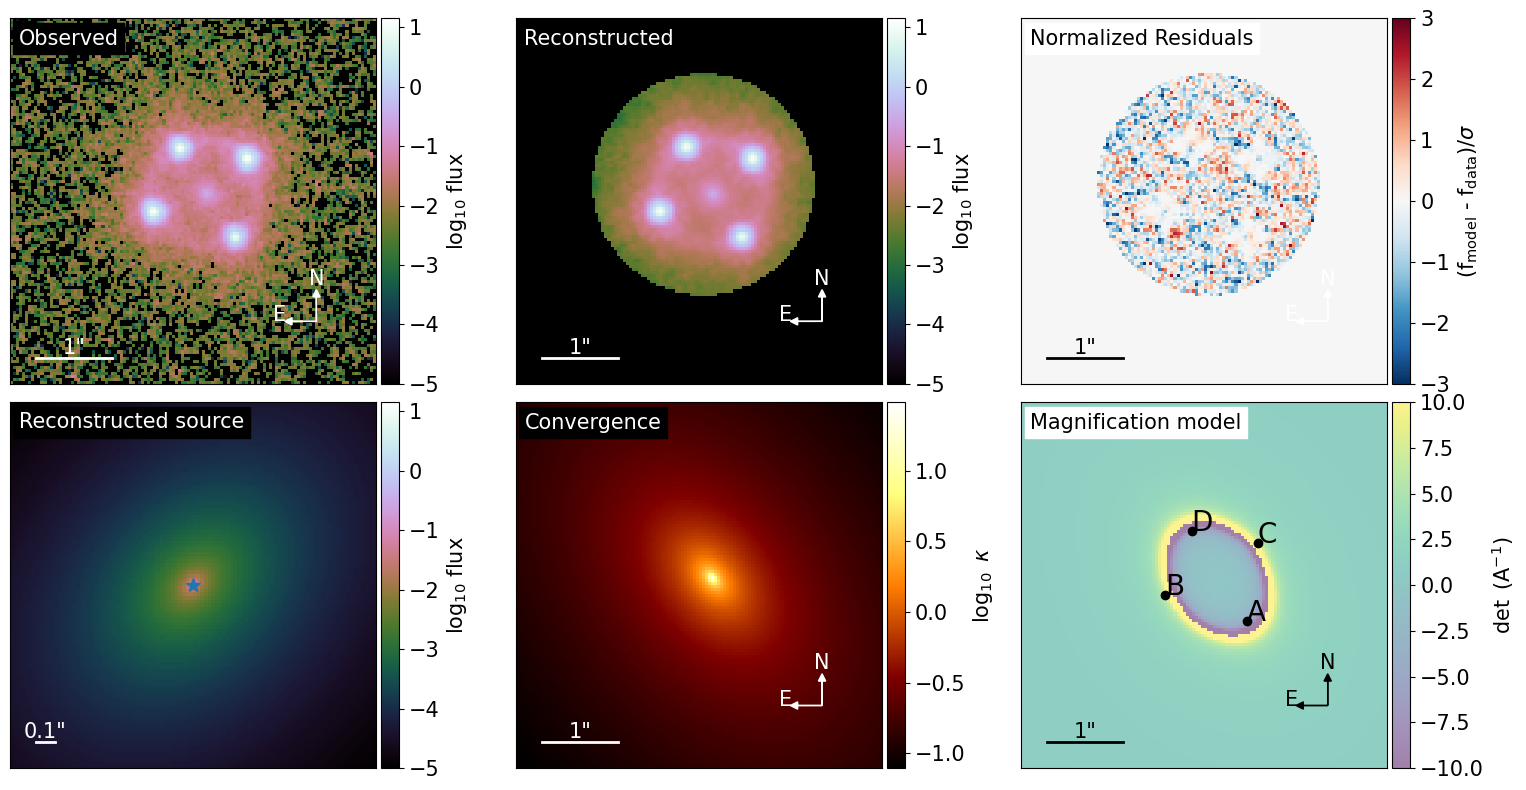

In [3]:
output = Output("../io_directory_example/")

fig = output.plot_model_overview(lens_name="lensed_quasar", model_id="example")

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

## Let's check the segmentation result as a demonstration

/var/folders/bn/g_64xdl56nj_f4wtmm1_bk9h0000gn/T/ipykernel_24278/4001223938.py:5: RuntimeWarning: invalid value encountered in log10
  axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
/var/folders/bn/g_64xdl56nj_f4wtmm1_bk9h0000gn/T/ipykernel_24278/4001223938.py:15: RuntimeWarning: invalid value encountered in log10
  axes[2].matshow(np.log10(image), origin="lower", cmap="cubehelix")


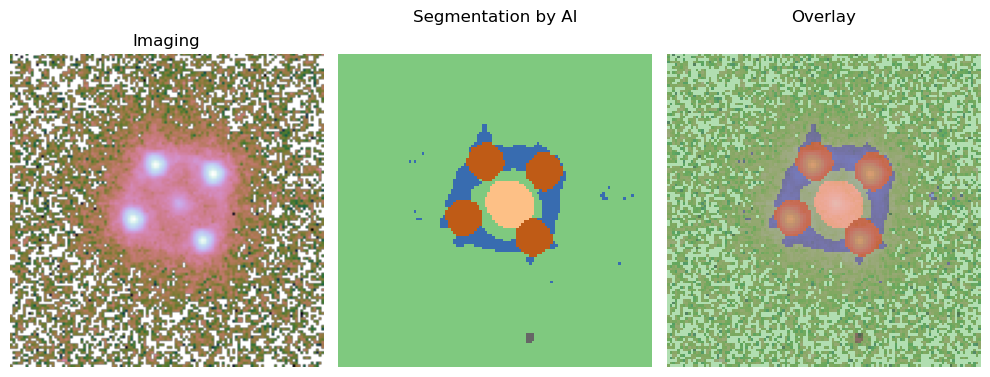

In [4]:
image = vision.get_image_data(lens_name, band).get_image()

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(np.log10(image), origin="lower", cmap="cubehelix")
axes[0].set_title("Imaging")
axes[0].axis("off")

cmap = "Accent"
# use qualitaive cmap for the segmentation plot
axes[1].matshow(segementation, origin="lower", cmap=cmap)
axes[1].set_title("Segmentation by AI")
axes[1].axis("off")

axes[2].matshow(np.log10(image), origin="lower", cmap="cubehelix")
axes[2].matshow(segementation, origin="lower", cmap=cmap, alpha=0.6)
axes[2].set_title("Overlay")
axes[2].axis("off")

fig.tight_layout()

## Let's check the automatically generated config file as a demonstration

In [5]:
output.get_lens_config(lens_name="lensed_quasar").settings

{'lens_name': 'lensed_quasar',
 'band': ['F814W'],
 'model': {'lens': ['EPL', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE'],
  'source_light': ['SERSIC_ELLIPSE'],
  'point_source': ['LENSED_POSITION']},
 'lens_option': {'centroid_init': [-0.20010800040962673, 0.03992600620768183],
  'centroid_bound': 0.2},
 'lens_light_option': {'fix': {0: {'n_sersic': 4.0}}},
 'source_light_option': {'n_max': [4]},
 'point_source_option': {'ra_init': [-0.5600833942543342,
   0.5203015179332511,
   -0.720542698210012,
   0.19982684291234332],
  'dec_init': [-0.4802068568093931,
   -0.15980758532019257,
   0.55973339340072,
   0.7200735755238816],
  'bound': 0.2},
 'numeric_option': {'supersampling_factor': [2]},
 'fitting': {'pso': True,
  'pso_settings': {'num_particle': 50, 'num_iteration': 50},
  'psf_iteration': True,
  'psf_iteration_settings': {'stacking_method': 'median',
   'num_iter': 20,
   'psf_iter_factor': 0.5,
   'keep_psf_variance_map': True,
   'psf_symmetry': 4,
   'block_cent